## Text Extraction

##### Author: Alex Sherman | alsherman@deloitte.com


Agenda:
- Extract Text from Word Documents
- Identify style (e.g. Bold, Font) and metadata (e.g. author) associated with document text
- Understand docx XML tag definitions
- Learn how to interact with Zip Files
- Identify content surrounding key piece of text

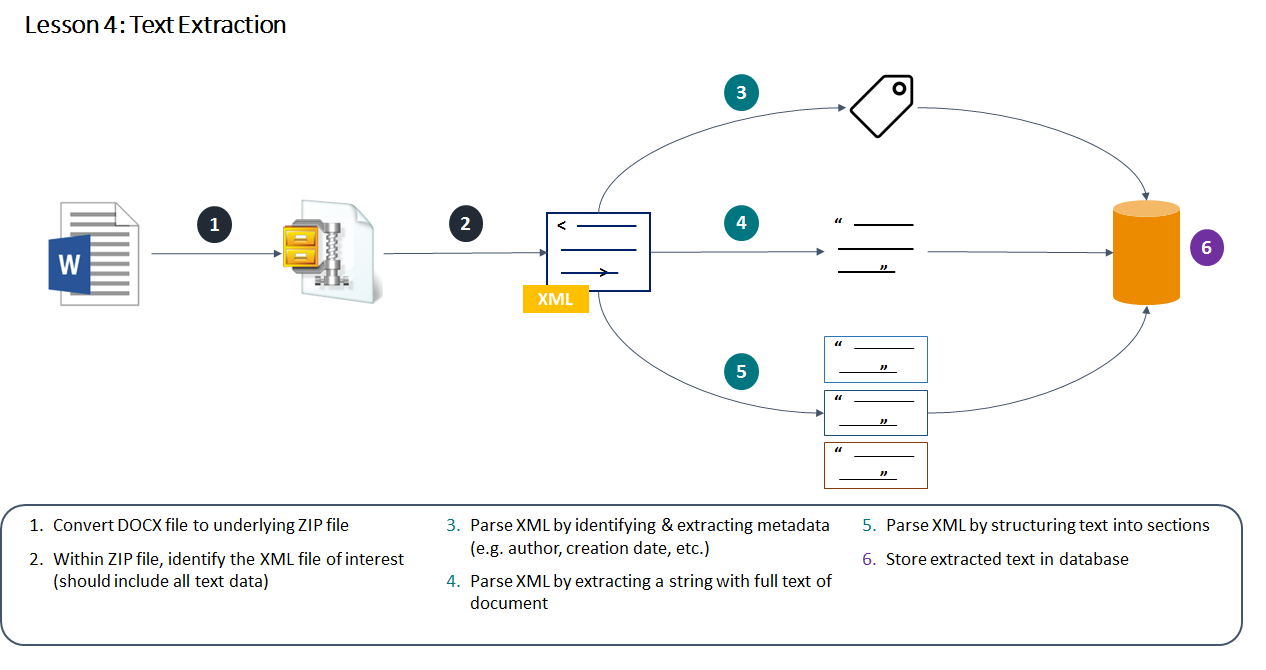

In [1]:
from IPython.display import Image
Image("../../raw_data/images/lesson4_text_extraction.png", width=800, height=700)

In [2]:
import os
from IPython.core.display import display, HTML
from configparser import ConfigParser, ExtendedInterpolation

config = ConfigParser(interpolation=ExtendedInterpolation())
config.read('../../config.ini')

DOCX_PATH = config['DOCX']['DOCX_PATH']
XML_PATH = config['DOCX']['XML_PATH']
EXAMPLE_ZIP = config['DOCX']['EXAMPLE_ZIP']

### python-docx

python-docx is a Python library for creating, updating, and extracting text from Microsoft Word (.docx) files.

In [3]:
sqlalchemy_url = 'https://python-docx.readthedocs.io/en/latest/'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(sqlalchemy_url)
HTML(iframe)

In [4]:
# the Document method reads the text, style, and formatting of a word .docx document
import docx
doc = docx.Document(DOCX_PATH)

### Paragraphs

Word paragraphs contain the text of the document. However, the table text, headers, footers, are not included in paragraphs.

In [5]:
# get all paragraphs 
paragraphs = doc.paragraphs

In [6]:
# count all paragraphs in the document
len(paragraphs)

2579

In [7]:
# only include with text (ignore empty strings)
paragraphs = [p for p in paragraphs if p.text.strip() != '']

### Style

In [8]:
# view the text in the first paragraph
paragraphs[0].text

'SOUTHWEST AIRLINES CO.'

In [9]:
# get the paragraph style
paragraphs[0].style.name

'Normal'

In [10]:
# Identify if paragraph text has 'HEADING' style
# HEADING is always uppercase 

'HEADING' in paragraphs[0].style.name

False

### Runs

Each paragraph may contain one or more runs. A run denotes the style attached to the text in a paragraph. Every time the style change (e.g. from bold to normal text) a new run is added.

In [11]:
runs = paragraphs[0].runs
runs

In [12]:
# View all the runs in the paragraph
[run.text for run in runs]

['', '', 'SOUTHWEST AIRLINES CO.']

In [15]:
# each run contains a portion of text from the paragraph
run = runs[2]
run.text

'SOUTHWEST AIRLINES CO.'

### Run style

- Each run contains style information such as bold, italic, or underline. 
- The style information will be True, False, or None
- A value of None indicates the run has no directly-applied style value and so will inherit the value of its containing paragraph.

In [16]:
# font size
run.font.size.pt

12.0

In [17]:
print(run.italic)

None


In [18]:
print(run.underline)

None


In [19]:
print(run.bold)

True


In [20]:
# View all the run stlye 
[run.bold for run in runs]

[None, None, True]

## Exercise

#### Find all the bold runs

- Iterate through all the runs in all the paragraphs to identify any run with a bold style applied.
- Store all the bold text in a list named bold_text
- Do not include empty strings (e.g. '') 
- print the first 10 items in bold_text

In [ ]:
# TODO


### Create a function to determine if all runs in a paragraph are bold

- Name the function is_bold
- Return True if all runs (with text) in a paragraph are bold
- Test the function by adding all the bold paragraphs to a list named bold_paragraphs
- Print the first 10 paragraphs in bold_paragraphs

In [279]:
# create the function is_bold
def is_bold(paragraph):
    # TODO


In [280]:
# test the is_bold function
bold_paragraphs = []
# TODO

bold_paragraphs[0:10]

['ORACLE CORP',
 'FORM 10-K',
 'UNITED STATES',
 'SECURITIES AND EXCHANGE COMMISSION',
 'FORM 10-K',
 'TRANSITION REPORT PURSUANT TO SECTION 13 OR 15(d) OF THE SECURITIES EXCHANGE ACT OF 1934',
 'For the transition period from\tto  \t Commission file number: 001-35992',
 'Oracle Corporation',
 '(Exact name of registrant as specified in its charter)',
 '(State or other jurisdiction of incorporation or organization)']

### Tables

In [113]:
# identify all document tables
tables = doc.tables

In [101]:
# count the document tables
len(tables)

74

In [281]:
table_cells = [cell.text.strip() 
               for cell in table._cells if cell.text != '']

table_cells[0:10]

['TABLE OF CONTENTS',
 'Page',
 'PART I.',
 'Item 1.',
 'Business',
 '3',
 'Item 1A.',
 'Risk Factors',
 '19',
 'Item 1B.']

### Core Properties

In [302]:
doc.core_properties.title

'ORACLE CORP'

In [301]:
doc.core_properties.subject

'FORM 10-K (Annual Report) Filed 06/25/15 for the Period Ending 05/31/15'

In [298]:
doc.core_properties.author

'EDGAR Online, Inc.'

In [308]:
doc.core_properties.created

datetime.datetime(2017, 10, 9, 1, 40, 51)

In [305]:
doc.core_properties.revision

0

## Explore docx xml
Every word document is a zip of xml files. To test this, change the extension of any word file from .docx to .xml. 

Inside each zip, a directory named word contains document.xml. This file contains all of the xml for the word document.

To open the zip we use the package zipfile

In [3]:
XML_PATH

'C:\\Users\\alsherman\\Desktop\\PycharmProjects\\firm_initiatives\\ml_guild\\raw_data\\docx_example.zip'

### zipfile

ZipFile - The class for reading and writing ZIP files
read - Returns the bytes content from a zipfile

In [314]:
sqlalchemy_url = 'https://docs.python.org/2/library/zipfile.html#zipfile-objects'
iframe = '<iframe src={} width=1100 height=300></iframe>'.format(sqlalchemy_url)
HTML(iframe)

In [3]:
import zipfile

zipf = zipfile.ZipFile(XML_PATH, 'r')

In [4]:
for f in zipf.filelist:
    print(f.filename)

[Content_Types].xml
_rels/.rels
word/_rels/document.xml.rels
word/document.xml
word/theme/theme1.xml
word/settings.xml
word/fontTable.xml
word/webSettings.xml
docProps/app.xml
docProps/core.xml
word/styles.xml


In [5]:
xml_content = zipf.read('word/document.xml')

In [204]:
from bs4 import BeautifulSoup

b = BeautifulSoup(xml_content, 'lxml')

In [209]:
# view the xml from a short document with one heading and one sentence
for word in b.find('w:body'):
    print(word)
    print()

<w:p w:rsidp="00A96863" w:rsidr="007F6AD8" w:rsidrdefault="00A96863"><w:ppr><w:pstyle w:val="Heading1"></w:pstyle></w:ppr><w:r><w:t>Section Header</w:t></w:r></w:p>

<w:p w:rsidr="00A96863" w:rsidrdefault="00A96863"><w:r><w:t>Text in the section</w:t></w:r><w:bookmarkstart w:id="0" w:name="_GoBack"></w:bookmarkstart><w:bookmarkend w:id="0"></w:bookmarkend></w:p>

<w:sectpr w:rsidr="00A96863"><w:pgsz w:h="15840" w:w="12240"></w:pgsz><w:pgmar w:bottom="1440" w:footer="720" w:gutter="0" w:header="720" w:left="1440" w:right="1440" w:top="1440"></w:pgmar><w:cols w:space="720"></w:cols><w:docgrid w:linepitch="360"></w:docgrid></w:sectpr>



### docx XML tag definitions
- < w:body > - contains the document paragraphs
- < w:p > - Document paragraph
- < w:pstyle > Document Style (e.g. Header 1)
- < w:t > text in a paragraph or run
- < w:bookmarkstart > defines a bookmark, such as a link in a table of contents
- < w:r > - Document runs. Every time the style in a paragraph changes, for instance a bold or underline term, a new run is added. Each paragraph may contain multiple runs.


In [2]:
# view the lesson3 directory - notice there is no 'word' directory
%ls

 Volume in drive C is OSDisk
 Volume Serial Number is 1C4D-03FA

 Directory of C:\Users\alsherman\Desktop\PycharmProjects\firm_initiatives\ml_guild\lessons\lesson3_text_extraction

03/11/2018  09:23 PM    <DIR>          .
03/11/2018  09:23 PM    <DIR>          ..
03/03/2018  03:07 AM    <DIR>          .ipynb_checkpoints
03/11/2018  09:23 PM            97,427 text_extraction_lesson.ipynb
03/11/2018  09:23 PM           102,307 text_extraction_solution.ipynb
               2 File(s)        199,734 bytes
               3 Dir(s)  212,704,206,848 bytes free


In [3]:
# Extract a member from the archive to the current working directory
zipf.extract('word/document.xml')

NameError: name 'zipf' is not defined

In [4]:
# view the lesson3 directory with a 'word' directory
%ls

 Volume in drive C is OSDisk
 Volume Serial Number is 1C4D-03FA

 Directory of C:\Users\alsherman\Desktop\PycharmProjects\firm_initiatives\ml_guild\lessons\lesson3_text_extraction

03/11/2018  09:23 PM    <DIR>          .
03/11/2018  09:23 PM    <DIR>          ..
03/03/2018  03:07 AM    <DIR>          .ipynb_checkpoints
03/11/2018  09:23 PM            97,427 text_extraction_lesson.ipynb
03/11/2018  09:23 PM           102,307 text_extraction_solution.ipynb
               2 File(s)        199,734 bytes
               3 Dir(s)  212,703,875,072 bytes free


### Exercise

In this exercise, we will search through several Oracle annual reports to find selected text throughout all the documents without needing to extract the files from the zip manually. 

In [4]:
EXAMPLE_ZIP

'C:\\Users\\alsherman\\Desktop\\PycharmProjects\\firm_initiatives\\ml_guild\\raw_data\\oracle-corporation.zip'

In [6]:
# use zipfile to read the EXAMPLE_ZIP


In [14]:
# How many documents are in the provided zip?


In [ ]:
# view the filenames
# use the .filename attribute on each file in zip.filelist


In [15]:
# Find the five paragraphs scattered in all the documents in the zip
# that speak about 'Financial Accounting Standards No. 109'

# iterate through the filelist

    # use zip.extract the file to the currect working directory

    # open the document with docx
    
    # iterate through the paragraphs in the document
    
        # check which paragraphs contain 'Financial Accounting Standards No. 109'
        
            # print the paragraphs that meet the condition
            